In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression


### Read/Import Data

In [5]:
cars_df = pd.read_csv("cars.csv")
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [6]:
cars_df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
cars_df.shape

(81, 5)

In [8]:
cars_df.describe(include='all')

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [9]:
cars_df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [10]:
cars_df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

### Assumptions check

1. ## Data should be linear

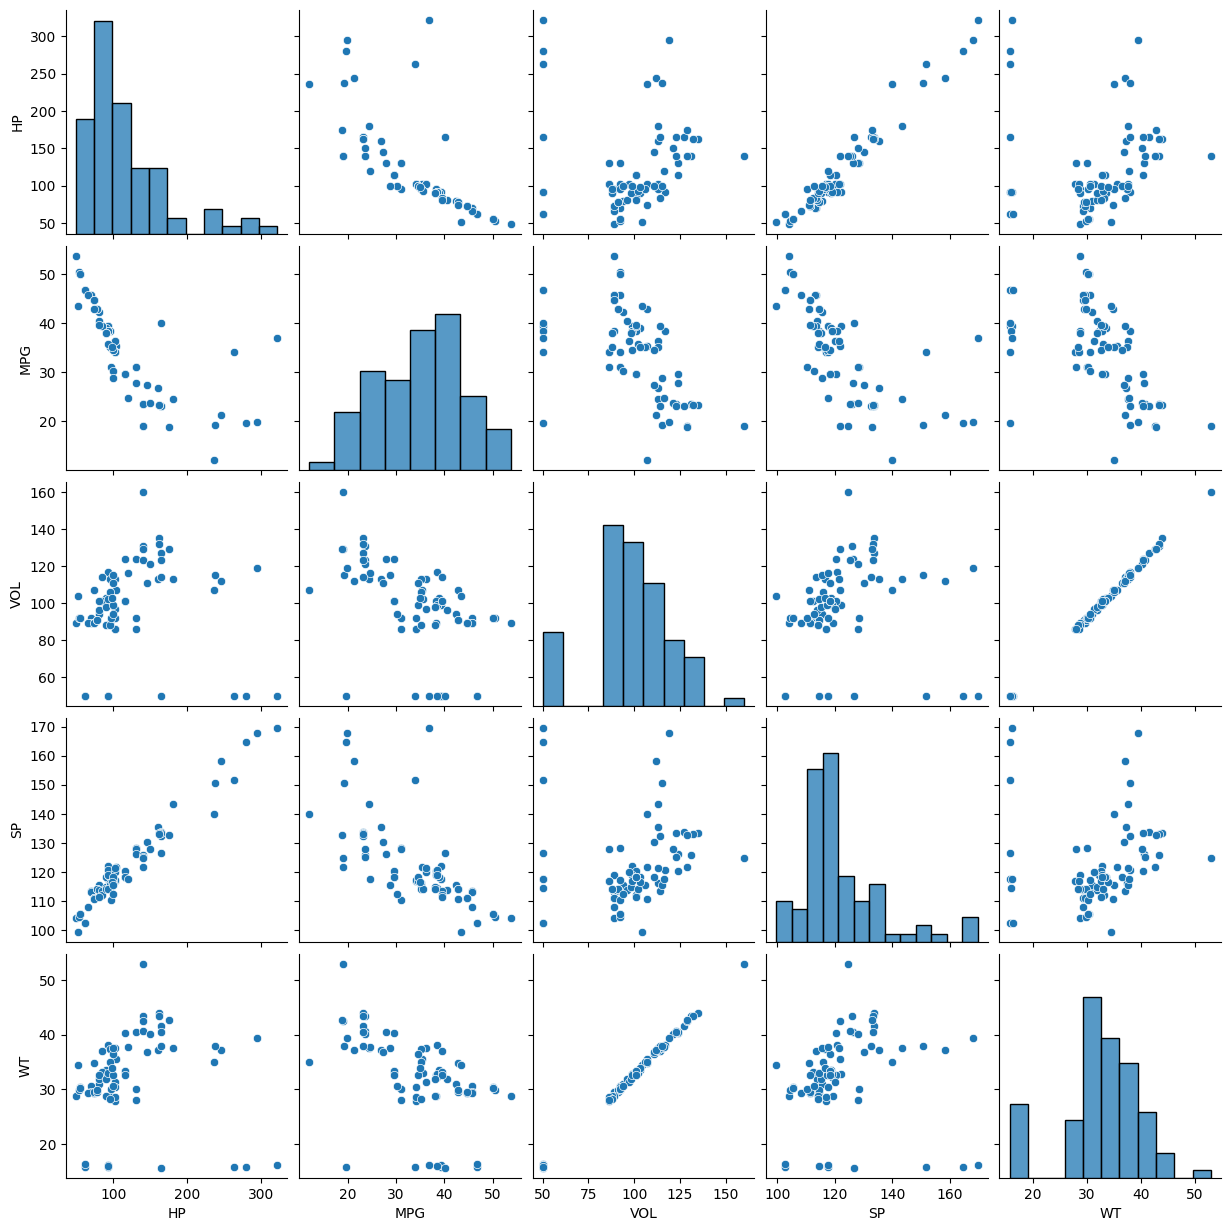

In [11]:
sns.pairplot(data=cars_df)

### 2. Homoscedasticity

#### Model Preparation

In [12]:
model = smf.ols(formula='MPG~HP+WT+SP+VOL',data=cars_df).fit()

In [13]:
model.params

Intercept    30.677336
HP           -0.205444
WT            0.400574
SP            0.395627
VOL          -0.336051
dtype: float64

### Hypothesis Formaulation:
- H0: Features are not important
- H1: Features are important

In [14]:
model.pvalues

Intercept    0.042936
HP           0.000001
WT           0.813649
SP           0.014579
VOL          0.556294
dtype: float64

In [15]:
# R-Squared and Adjusted R-squared
model.rsquared,model.rsquared_adj

(np.float64(0.7705372737359844), np.float64(0.7584602881431415))

In [16]:
# residuals
model.resid

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

In [17]:
import statsmodels.api as sm

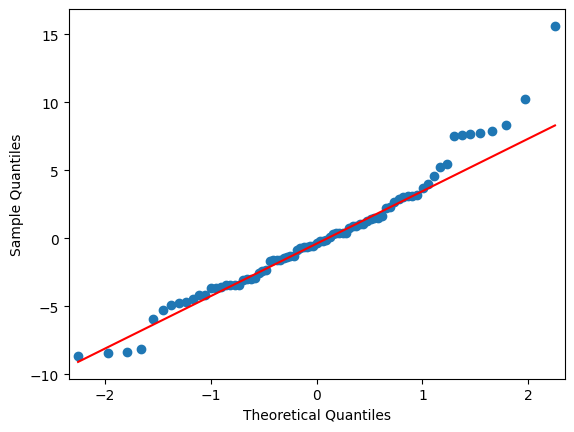

In [18]:
sm.qqplot(model.resid,line='q')
plt.show()

### Detecting Outlires/Influencers

In [19]:
model_influence = model.get_influence()
c = model_influence.cooks_distance

In [21]:
print(c)

(array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
     

ValueError: could not broadcast input array from shape (162,) into shape (81,)

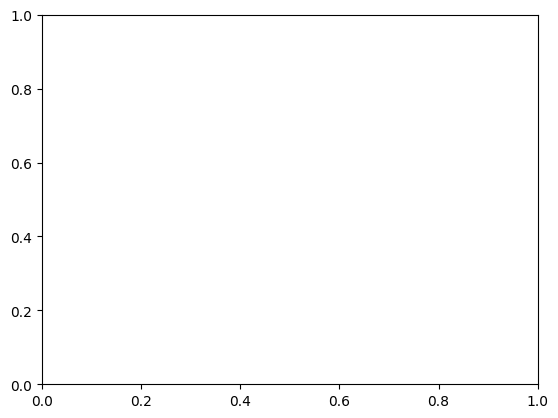

In [26]:
plt.stem(np.arange(len(cars_df)),np.round(c,3))
plt.show()

In [39]:
cars_df.drop(cars_df.index=[[70,76]],axis=0,inplace=True)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (85138824.py, line 1)

### Model Preparation

In [40]:
model2 = smf.ols(formula='MPG~WT+SP+VOL+HP',data=cars_df).fit()

In [41]:
model2.rsquared,model2.rsquared_adj

(np.float64(0.7705372737359844), np.float64(0.7584602881431415))